# Basics of Image analysis

This notebook demonstrates a few basic techniques to analyse and process images.

We start by importing the neccessary libraries in python

In [13]:
import matplotlib.pyplot as plt
import cv2 as cv
from skimage import filters
from skimage.io import imread
import urllib.request
import os

### Download necesary files from the internet
This downloads all the necessary files if the notebooks is being run on a google colab. If this notebook runs after being downloaded from github the data files are already included and will not be downloaded.

Image.tif already exists


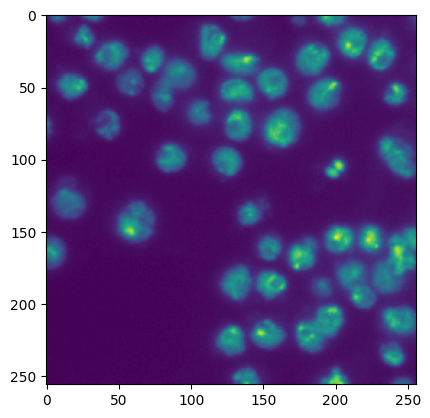

In [14]:
# import tif image
if not os.path.exists("data/0bf4b1.tif"):
  urllib.request.urlretrieve("https://moritzgmarquardt.de/202503_ibec_ml_workshop/0bf4b1.tif", "data/0bf4b1.tif")
  print("Downloaded 0bf4b1.tif")
else:
  print("Image.tif already exists")
img = imread("data/0bf4b1.tif")
plt.imshow(img)
plt.show()

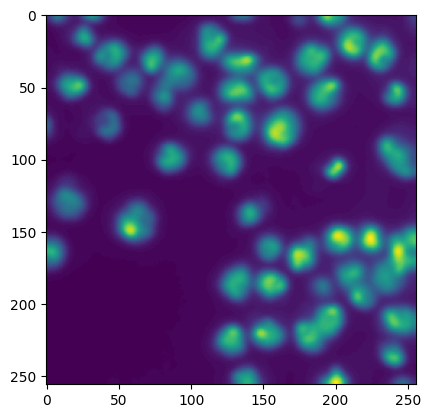

In [15]:
filtered_image = cv.bilateralFilter(img, 9, 75, 75)
plt.imshow(filtered_image)
plt.show()

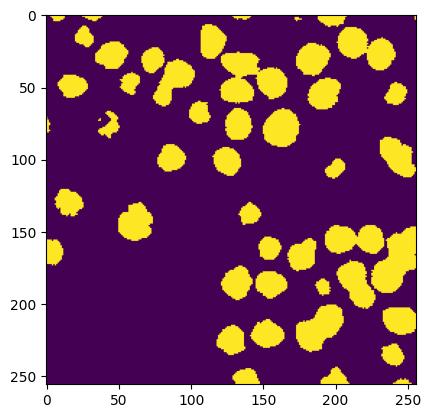

In [18]:
otsu = filters.threshold_otsu(filtered_image)
plt.imshow(img > otsu)

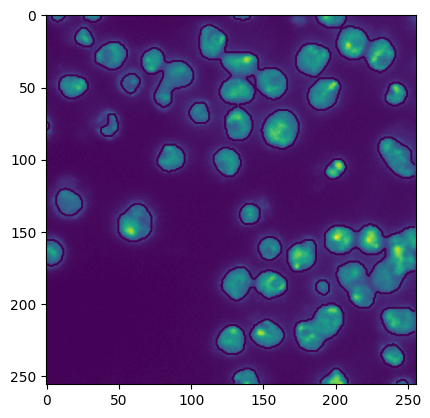

In [ ]:
plt.imshow(img)
plt.contour(filtered_image > watershed_image)
plt.show()

## split touching objects
(noteboook available in the collection of notebooks)

In [ ]:
from napari_segment_blobs_and_things_with_membranes import threshold_otsu, split_touching_objects
from skimage.io import imread
from skimage import data
from pyclesperanto_prototype import imshow

blobs = imread('../../data/blobs.tif')

binary = threshold_otsu(blobs)

imshow(binary)

split_objects = split_touching_objects(binary)
imshow(split_objects)